In [2]:
import numpy as np
import pandas as pd


from datetime import date,datetime,timedelta
from dateutil.parser import parse

import json
import re
from glob import glob
import time

# 시각화
%matplotlib inline
import seaborn as sns
import folium as g

import matplotlib.pyplot as plt
from matplotlib import rc
# 한글 폰트 문제 해결
rc('font', family='AppleGothic')
# 차트 축 <- 음수 부호 지원
plt.rcParams['axes.unicode_minus'] = False


# 크롤링
from bs4 import BeautifulSoup
from urllib.request import urlopen, urlretrieve
from urllib.error   import HTTPError
from urllib.error   import URLError

from selenium import webdriver

### selenium

In [5]:
path = './driver/chromedriver'
driver = webdriver.Chrome(path)
driver.get('http://www.naver.com')
time.sleep(3)
driver.close()

In [16]:
# beautifulsoup
try : 
    html = urlopen('http://www.pythonscraping.com/pages/page3.html')
    #print(html.read())
except HTTPError as he:
    print('http error')
except URLError as ue:
    print('url error')
else:
    soup = BeautifulSoup(html.read(),'html.parser')
print(soup.select('tr#gift1')) # bs4 객체다

#selenium

path = './driver/chromedriver'
driver = webdriver.Chrome(path)
driver.get('http://www.pythonscraping.com/pages/page3.html')
print(driver.find_element_by_css_selector('tr#gift1'))      # webElement 객체다
time.sleep(3)
driver.close()


[<tr class="gift" id="gift1"><td>
Vegetable Basket
</td><td>
This vegetable basket is the perfect gift for your health conscious (or overweight) friends!
<span class="excitingNote">Now with super-colorful bell peppers!</span>
</td><td>
$15.00
</td><td>
<img src="../img/gifts/img1.jpg"/>
</td></tr>]
<selenium.webdriver.remote.webelement.WebElement (session="74fb77cb3eff75485b739cc2a671b850", element="587485e1-565d-4c31-bc7f-34dc5fefb24e")>


### selenium 제어
- click()
- is_enabled()
등등은 다음장에서 더 자세히 다뤄보자

### css selector
1. beautifulsoup - select
2.  selenium - fine_element_by_css_selector ,fine_elements_by_css_selector

- id:# class:. 을 사용한다
    - .value 클래스 value인 모든 element
    - #value 아디디가 value인 모든 element
    - element.'value' 클래스가 value인 element
    - element#'value' 아이디가 value인 element
- attribute 속성 사용
    - element[attribute] 속성을 가지는 element
    - element[attribute=='value'] 속성값이 value인 element
    - element[attribute1=='value1'][attribute2=='value2'] beautifulsoup에서 지원 불가 find로 대체
    >  - 속성(attribute)의 값이 특정 값과 정확히 일치하는 경우: =
    >  - 속성(attribute)의 값이 특정 값으로 시작하는 경우: ^=
    >  - 속성(attribute)의 값이 특정 값으로 끝나는 경우: \$=
    >  - 속성(attribute)의 값이 특정 값을 포함하는 경우: *= 
- 자식
    - element > element dicrect 자식 
    - element element 하위 자식

- 태그들 순서 이용 (태그에만 적용된다) 
    - nth-child() nth-of-type() : selenium
    - nth-of-type() : beautifulsoup

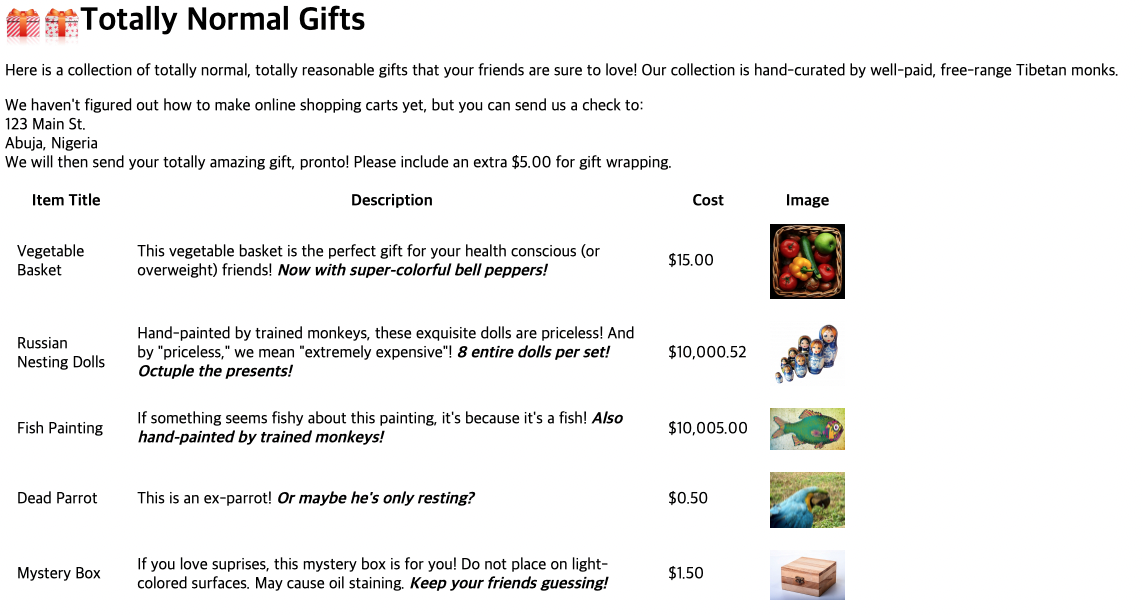

In [8]:
try : 
    html = urlopen('http://www.pythonscraping.com/pages/page3.html')
    #print(html.read())
except HTTPError as he:
    print('http error')
except URLError as ue:
    print('url error')
else:
    soup = BeautifulSoup(html.read(),'html.parser')

In [9]:
soup.select('tr')

[<tr><th>
 Item Title
 </th><th>
 Description
 </th><th>
 Cost
 </th><th>
 Image
 </th></tr>,
 <tr class="gift" id="gift1"><td>
 Vegetable Basket
 </td><td>
 This vegetable basket is the perfect gift for your health conscious (or overweight) friends!
 <span class="excitingNote">Now with super-colorful bell peppers!</span>
 </td><td>
 $15.00
 </td><td>
 <img src="../img/gifts/img1.jpg"/>
 </td></tr>,
 <tr class="gift" id="gift2"><td>
 Russian Nesting Dolls
 </td><td>
 Hand-painted by trained monkeys, these exquisite dolls are priceless! And by "priceless," we mean "extremely expensive"! <span class="excitingNote">8 entire dolls per set! Octuple the presents!</span>
 </td><td>
 $10,000.52
 </td><td>
 <img src="../img/gifts/img2.jpg"/>
 </td></tr>,
 <tr class="gift" id="gift3"><td>
 Fish Painting
 </td><td>
 If something seems fishy about this painting, it's because it's a fish! <span class="excitingNote">Also hand-painted by trained monkeys!</span>
 </td><td>
 $10,005.00
 </td><td>
 <img

In [11]:
# tr중에서
# th는 뻬고 사용할거다

# for tr in soup.find_all('tr'):
#     if tr.has_attr('class') and tr['class']==['gift']: # html에서 class는 여러개의 값을 가질수 있기 때문이다
#         display(tr)

# for tr in soup.find_all('tr',class_='gift'):
#     display(tr)

# 위의 두개의 예시처럼 너무 어렵게 할필요가 없다
for tr in soup.select('tr.gift'):
    display(tr)

<tr class="gift" id="gift1"><td>
Vegetable Basket
</td><td>
This vegetable basket is the perfect gift for your health conscious (or overweight) friends!
<span class="excitingNote">Now with super-colorful bell peppers!</span>
</td><td>
$15.00
</td><td>
<img src="../img/gifts/img1.jpg"/>
</td></tr>

<tr class="gift" id="gift2"><td>
Russian Nesting Dolls
</td><td>
Hand-painted by trained monkeys, these exquisite dolls are priceless! And by "priceless," we mean "extremely expensive"! <span class="excitingNote">8 entire dolls per set! Octuple the presents!</span>
</td><td>
$10,000.52
</td><td>
<img src="../img/gifts/img2.jpg"/>
</td></tr>

<tr class="gift" id="gift3"><td>
Fish Painting
</td><td>
If something seems fishy about this painting, it's because it's a fish! <span class="excitingNote">Also hand-painted by trained monkeys!</span>
</td><td>
$10,005.00
</td><td>
<img src="../img/gifts/img3.jpg"/>
</td></tr>

<tr class="gift" id="gift4"><td>
Dead Parrot
</td><td>
This is an ex-parrot! <span class="excitingNote">Or maybe he's only resting?</span>
</td><td>
$0.50
</td><td>
<img src="../img/gifts/img4.jpg"/>
</td></tr>

<tr class="gift" id="gift5"><td>
Mystery Box
</td><td>
If you love suprises, this mystery box is for you! Do not place on light-colored surfaces. May cause oil staining. <span class="excitingNote">Keep your friends guessing!</span>
</td><td>
$1.50
</td><td>
<img src="../img/gifts/img6.jpg"/>
</td></tr>

#### attribute 속성 사용

In [ ]:
# tr중에 id 속성이 있는 tr만
for tr in soup.select('tr[id]'):
    display(tr)

In [14]:
# tr중에 id 속성이 'gift1'인것만

# for tr in soup.select('tr#gift1'):
#     display(tr)

for tr in soup.select('tr[id="gift1"]'):
    display(tr)

<tr class="gift" id="gift1"><td>
Vegetable Basket
</td><td>
This vegetable basket is the perfect gift for your health conscious (or overweight) friends!
<span class="excitingNote">Now with super-colorful bell peppers!</span>
</td><td>
$15.00
</td><td>
<img src="../img/gifts/img1.jpg"/>
</td></tr>

In [71]:
# tr중에 id 속성이 'gift1'이고, class속성이 gift인 것만

# 아래는 unsupproted인거 같다
# for tr in soup.select('tr[id="gift1"][class="gift"]'):
#     display(tr)

# selenium에서는 support한다
# path = './driver/chromedriver'
# driver = webdriver.Chrome(path)
# driver.get('http://www.pythonscraping.com/pages/page3.html')
# print(driver.find_element_by_css_selector('tr[id="gift1"][class="gift"]').text)
# driver.close()

for tr in soup.find_all(attrs={'class':'gift','id':'gift1'}):
    display(tr)


<tr class="gift" id="gift1"><td>
Vegetable Basket
</td><td>
This vegetable basket is the perfect gift for your health conscious (or overweight) friends!
<span class="excitingNote">Now with super-colorful bell peppers!</span>
</td><td>
$15.00
</td><td>
<img src="../img/gifts/img1.jpg"/>
</td></tr>

In [74]:
# id가 4또는 5로 끝나는 경우
for tr in soup.select('tr[id$="4"],tr[id$=5]'):
    display(tr)

<tr class="gift" id="gift4"><td>
Dead Parrot
</td><td>
This is an ex-parrot! <span class="excitingNote">Or maybe he's only resting?</span>
</td><td>
$0.50
</td><td>
<img src="../img/gifts/img4.jpg"/>
</td></tr>

<tr class="gift" id="gift5"><td>
Mystery Box
</td><td>
If you love suprises, this mystery box is for you! Do not place on light-colored surfaces. May cause oil staining. <span class="excitingNote">Keep your friends guessing!</span>
</td><td>
$1.50
</td><td>
<img src="../img/gifts/img6.jpg"/>
</td></tr>

#### child or direct child

In [19]:
for img in soup.select('.gift img'):
    print(img['src'])

../img/gifts/img1.jpg
../img/gifts/img2.jpg
../img/gifts/img3.jpg
../img/gifts/img4.jpg
../img/gifts/img6.jpg


In [27]:
for img in soup.select('.gift > td > img'):
    print(img['src'])

../img/gifts/img1.jpg
../img/gifts/img2.jpg
../img/gifts/img3.jpg
../img/gifts/img4.jpg
../img/gifts/img6.jpg


#### ⭐ css selector 꿀팁
> - 크롬 개발자 도구에서 검사기능으로 css selector를 copy해올수있다
> - 이때 nth-child(#)이 붙는 경우가 있다
> - 전체 리스트가 필요한 경우는 이값을 지워야 하지만 나름 유용하게 사용할수있다

- beautifulsoup에서는 nth-of-type(#)
- selenium에서는 nth-child() 

In [ ]:
soup.select('tr:nth-of-type(2)')

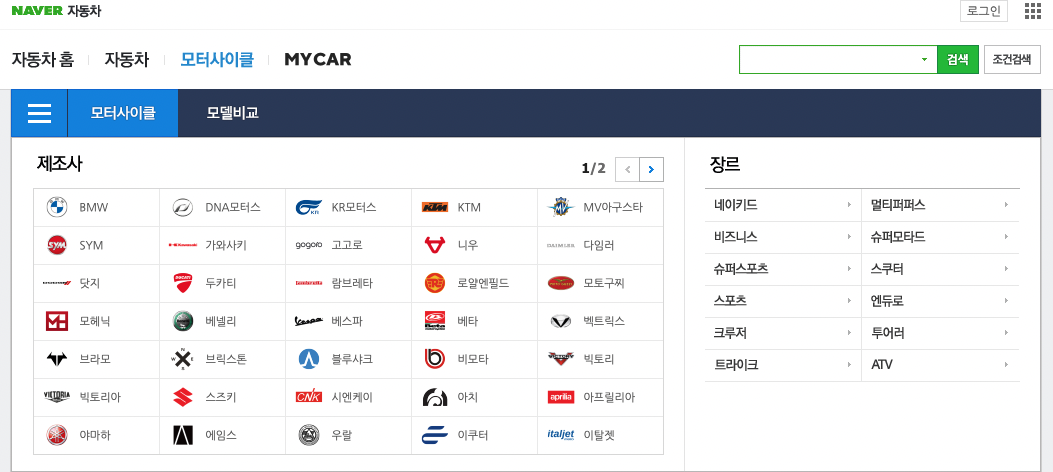

In [10]:
path = './driver/chromedriver'
driver = webdriver.Chrome(path)
driver.get('https://auto.naver.com/bike/mainList.nhn')

# 보여지게 해야된다 => 그래야 값을 추출가능
maker_btn = driver.find_element_by_css_selector('#_vendor_select_layer > a')
maker_btn.click()

# makers = driver.find_elements_by_css_selector('#_vendor_select_layer > div > div.maker_group > div:nth-child(2) > ul > li>a>img')


result=[]


# motort 사이클의 제조사를 다 추출하고 싶은데 next_btn을 누를때마다 보이지 않는 div.emblem_area 가 display:none 된다
# 따라서 순차적으로 div.emblem_area:nth-child(#) 검색하려한다

i=1
while True:  
    makers = driver.find_elements_by_css_selector('#_vendor_select_layer > div > div.maker_group > div.emblem_area:nth-child({}) > ul > li>a >span'.format(i))
    
    for maker in makers:
        result.append(maker.get_attribute('innerHTML'))
    next_btn = driver.find_element_by_css_selector('#_vendor_select_layer > div > div.maker_group > div.rolling_btn > button.next')
    if next_btn.is_enabled():
        next_btn.click()
        time.sleep(3)
        i+=1
    else:
        break
        
driver.close()
print(result)

['BMW', 'DNA모터스', 'KR모터스', 'KTM', 'MV아구스타', 'SYM', '가와사키', '고고로', '니우', '다임러', '닷지', '두카티', '람브레타', '로얄엔필드', '모토구찌', '모헤닉', '베넬리', '베스파', '베타', '벡트릭스', '브라모', '브릭스톤', '블루샤크', '비모타', '빅토리', '빅토리아', '스즈키', '시엔케이', '아치', '아프릴리아', '야마하', '에임스', '우랄', '이쿠터', '이탈젯', '인디언']


#### nth-of-type비교
- css selector에서는 tag에만 적용된다
- => 즉 div[class="emblem_area"]:nth-of-type(2) 에서 클래스가 emblem_area이면서 div중에서 두번째 div

- xpath에서는 다르다
- div[@class="emblem_area"][{}] 에서는 클래스가 emblem_area가인 div 중 두번째 div

##### 나라면 순서가 필요할때는 xpath 쓰겠다

In [30]:
path = './driver/chromedriver'
driver = webdriver.Chrome(path)
driver.get('https://auto.naver.com/bike/mainList.nhn')

makers = driver.find_elements_by_css_selector('#_vendor_select_layer > div > div.maker_group > div[class="emblem_area"]:nth-of-type(2) > ul > li>a >span')
for maker in makers:
    print(maker.get_attribute('innerHTML'),end=' ')

print()
makers = driver.find_elements_by_xpath('//*[@id="_vendor_select_layer"]/div/div[1]/div[@class="emblem_area"][1] / ul / li/ a / span')
for maker in makers:
    print(maker.get_attribute('innerHTML'),end=' ')
    
driver.close()

BMW DNA모터스 KR모터스 KTM MV아구스타 SYM 가와사키 고고로 니우 다임러 닷지 두카티 람브레타 로얄엔필드 모토구찌 모헤닉 베넬리 베스파 베타 벡트릭스 브라모 브릭스톤 블루샤크 비모타 빅토리 빅토리아 스즈키 시엔케이 아치 아프릴리아 야마하 에임스 우랄 이쿠터 이탈젯 인디언 
BMW DNA모터스 KR모터스 KTM MV아구스타 SYM 가와사키 고고로 니우 다임러 닷지 두카티 람브레타 로얄엔필드 모토구찌 모헤닉 베넬리 베스파 베타 벡트릭스 브라모 브릭스톤 블루샤크 비모타 빅토리 빅토리아 스즈키 시엔케이 아치 아프릴리아 야마하 에임스 우랄 이쿠터 이탈젯 인디언 

### xpath

### css selector
1. beautifulsoup은 지원하지 않는다
2. selenium - fine_element_by_xpath ,fine_elements_by_xpath

- / : 절대경로
- // : 문서 내에서 검색(not direct)
- * 매칭되는 모든 Node
- @* 매칭되는 모든 속성

- id 와 class
    - //*[@id="value"] : id가 value인 모든 element
    - //*[@class="value"] : class가 value인 모든 element
    - //element[@id='value'] : 아이디가 value인 element
    - //element[@class='value'] :클래스가 value인 element
    
- attribute 속성 사용
    - //element[@attribute] 속성을 가지는 element
    - //element[@attribute=='value'] 속성값이 value인 element
    - //element[@attribute1=='value1'][@attribute2=='value2'] beautifulsoup에서 지원 불가
    >  - 속성(attribute)의 값이 특정 값과 정확히 일치하는 경우: =
    >  - 속성(attribute)의 값이 특정 값으로 시작하는 경우: ^=
    >  - 속성(attribute)의 값이 특정 값으로 끝나는 경우: \$=
    >  - 속성(attribute)의 값이 특정 값을 포함하는 경우: *= 
    
- 자식
    - element/element dicrect 자식 
    - element//element 하위 자식(검색의 느낌이니깐)
    - element/element/* 모든 자식 요소 가져옴
    
- [] 
    - [#] 같은 요소중 #번째
    - [last()] 같은 태그중 마지막
    - [position()<#] #번째 전까지

In [88]:
path = './driver/chromedriver'
driver = webdriver.Chrome(path)
driver.get('http://www.pythonscraping.com/pages/page3.html')

#### a) 기본경로 표현

In [46]:
# 문서내에서 table찾고 table 밑에 tbody 밑에 tr 찾아라
driver.find_elements_by_xpath('//table/tbody/tr')

[<selenium.webdriver.remote.webelement.WebElement (session="68ffb5e7260e1eb98ec2c8d68c62cd02", element="55e22820-a361-40ac-905d-fe63c0da3972")>,
 <selenium.webdriver.remote.webelement.WebElement (session="68ffb5e7260e1eb98ec2c8d68c62cd02", element="767f1d6c-aff6-4671-acb5-3dce60f10f4a")>,
 <selenium.webdriver.remote.webelement.WebElement (session="68ffb5e7260e1eb98ec2c8d68c62cd02", element="a1fc2826-3284-4e56-a651-9d67febe00b6")>,
 <selenium.webdriver.remote.webelement.WebElement (session="68ffb5e7260e1eb98ec2c8d68c62cd02", element="b2e89251-682d-480d-a38e-24b98bf00636")>,
 <selenium.webdriver.remote.webelement.WebElement (session="68ffb5e7260e1eb98ec2c8d68c62cd02", element="9e101dbe-8af0-4f4b-958e-97078098c71d")>,
 <selenium.webdriver.remote.webelement.WebElement (session="68ffb5e7260e1eb98ec2c8d68c62cd02", element="c2b026f8-eaa2-4d3d-8558-dc55b54ca972")>]

In [52]:
# 문서내 모든 tr
for i in driver.find_elements_by_xpath('//tr'):
    print(i.get_attribute('outerHTML'))

<tr><th>
Item Title
</th><th>
Description
</th><th>
Cost
</th><th>
Image
</th></tr>
<tr id="gift1" class="gift"><td>
Vegetable Basket
</td><td>
This vegetable basket is the perfect gift for your health conscious (or overweight) friends!
<span class="excitingNote">Now with super-colorful bell peppers!</span>
</td><td>
$15.00
</td><td>
<img src="../img/gifts/img1.jpg">
</td></tr>
<tr id="gift2" class="gift"><td>
Russian Nesting Dolls
</td><td>
Hand-painted by trained monkeys, these exquisite dolls are priceless! And by "priceless," we mean "extremely expensive"! <span class="excitingNote">8 entire dolls per set! Octuple the presents!</span>
</td><td>
$10,000.52
</td><td>
<img src="../img/gifts/img2.jpg">
</td></tr>
<tr id="gift3" class="gift"><td>
Fish Painting
</td><td>
If something seems fishy about this painting, it's because it's a fish! <span class="excitingNote">Also hand-painted by trained monkeys!</span>
</td><td>
$10,005.00
</td><td>
<img src="../img/gifts/img3.jpg">
</td></tr>


#### b) attibute 사용

In [59]:
# class attribute존재하는 모든 요소
driver.find_elements_by_xpath('//*[@class]')

[<selenium.webdriver.remote.webelement.WebElement (session="68ffb5e7260e1eb98ec2c8d68c62cd02", element="767f1d6c-aff6-4671-acb5-3dce60f10f4a")>,
 <selenium.webdriver.remote.webelement.WebElement (session="68ffb5e7260e1eb98ec2c8d68c62cd02", element="b21271dd-3926-4111-acf2-3a9746637863")>,
 <selenium.webdriver.remote.webelement.WebElement (session="68ffb5e7260e1eb98ec2c8d68c62cd02", element="a1fc2826-3284-4e56-a651-9d67febe00b6")>,
 <selenium.webdriver.remote.webelement.WebElement (session="68ffb5e7260e1eb98ec2c8d68c62cd02", element="9e41477a-3877-4166-86ef-b9f428874a3a")>,
 <selenium.webdriver.remote.webelement.WebElement (session="68ffb5e7260e1eb98ec2c8d68c62cd02", element="b2e89251-682d-480d-a38e-24b98bf00636")>,
 <selenium.webdriver.remote.webelement.WebElement (session="68ffb5e7260e1eb98ec2c8d68c62cd02", element="6fbe30e4-7cfc-453c-98b0-7b39de1564d5")>,
 <selenium.webdriver.remote.webelement.WebElement (session="68ffb5e7260e1eb98ec2c8d68c62cd02", element="9e101dbe-8af0-4f4b-958e-97

In [56]:
# 문선 내에서 하위로 존재하는 모든 요소중 src 속성을 가지는 요소만
for i in driver.find_elements_by_xpath('//*[@src]'):
    print(i.get_attribute('outerHTML'))

<img src="../img/gifts/logo.jpg" style="float:left;">
<img src="../img/gifts/img1.jpg">
<img src="../img/gifts/img2.jpg">
<img src="../img/gifts/img3.jpg">
<img src="../img/gifts/img4.jpg">
<img src="../img/gifts/img6.jpg">


In [55]:
# tr밑에서 하위로 존재하는 모든 요소중 src 속성을 가지는 요소만
for i in driver.find_elements_by_xpath('//tr//*[@src]'):
    print(i.get_attribute('outerHTML'))

<img src="../img/gifts/img1.jpg">
<img src="../img/gifts/img2.jpg">
<img src="../img/gifts/img3.jpg">
<img src="../img/gifts/img4.jpg">
<img src="../img/gifts/img6.jpg">


In [58]:
# class가 gift인 tr
for i in driver.find_elements_by_xpath('//tr[@class="gift"]'):
    print(i.get_attribute('outerHTML'))
    print('*'*100)

<tr id="gift1" class="gift"><td>
Vegetable Basket
</td><td>
This vegetable basket is the perfect gift for your health conscious (or overweight) friends!
<span class="excitingNote">Now with super-colorful bell peppers!</span>
</td><td>
$15.00
</td><td>
<img src="../img/gifts/img1.jpg">
</td></tr>
****************************************************************************************************
<tr id="gift2" class="gift"><td>
Russian Nesting Dolls
</td><td>
Hand-painted by trained monkeys, these exquisite dolls are priceless! And by "priceless," we mean "extremely expensive"! <span class="excitingNote">8 entire dolls per set! Octuple the presents!</span>
</td><td>
$10,000.52
</td><td>
<img src="../img/gifts/img2.jpg">
</td></tr>
****************************************************************************************************
<tr id="gift3" class="gift"><td>
Fish Painting
</td><td>
If something seems fishy about this painting, it's because it's a fish! <span class="excitingNote">Als

In [ ]:
# 조건 여러개
driver.find_elements_by_xpath('//tr[@class="gift"][@id="gift1"]')

#### c) 자식 및 [ ] 사용법

In [62]:
# 문서 내 table찾고 table밑에 tbody 밑에 모든 자식
for i in driver.find_elements_by_xpath('//table/tbody/*'):
    print(i.get_attribute('outerHTML'))
    print('*'*100)

<tr><th>
Item Title
</th><th>
Description
</th><th>
Cost
</th><th>
Image
</th></tr>
****************************************************************************************************
<tr id="gift1" class="gift"><td>
Vegetable Basket
</td><td>
This vegetable basket is the perfect gift for your health conscious (or overweight) friends!
<span class="excitingNote">Now with super-colorful bell peppers!</span>
</td><td>
$15.00
</td><td>
<img src="../img/gifts/img1.jpg">
</td></tr>
****************************************************************************************************
<tr id="gift2" class="gift"><td>
Russian Nesting Dolls
</td><td>
Hand-painted by trained monkeys, these exquisite dolls are priceless! And by "priceless," we mean "extremely expensive"! <span class="excitingNote">8 entire dolls per set! Octuple the presents!</span>
</td><td>
$10,000.52
</td><td>
<img src="../img/gifts/img2.jpg">
</td></tr>
***************************************************************************

In [63]:
# 당연히 없다
# table을 못찾는다
driver.find_elements_by_xpath('/table/tbody/*')

[]

In [89]:
# 첫번째 꺼만
driver.find_element_by_xpath('//tr[@class][1]').get_attribute('outerHTML')

'<tr id="gift1" class="gift"><td>\nVegetable Basket\n</td><td>\nThis vegetable basket is the perfect gift for your health conscious (or overweight) friends!\n<span class="excitingNote">Now with super-colorful bell peppers!</span>\n</td><td>\n$15.00\n</td><td>\n<img src="../img/gifts/img1.jpg">\n</td></tr>'

In [66]:
for i in driver.find_elements_by_xpath('//tr[@class][position()<3]'): # 출력 2개만
    print(i.get_attribute('outerHTML'))
    print('*'*100)

<tr id="gift1" class="gift"><td>
Vegetable Basket
</td><td>
This vegetable basket is the perfect gift for your health conscious (or overweight) friends!
<span class="excitingNote">Now with super-colorful bell peppers!</span>
</td><td>
$15.00
</td><td>
<img src="../img/gifts/img1.jpg">
</td></tr>
****************************************************************************************************
<tr id="gift2" class="gift"><td>
Russian Nesting Dolls
</td><td>
Hand-painted by trained monkeys, these exquisite dolls are priceless! And by "priceless," we mean "extremely expensive"! <span class="excitingNote">8 entire dolls per set! Octuple the presents!</span>
</td><td>
$10,000.52
</td><td>
<img src="../img/gifts/img2.jpg">
</td></tr>
****************************************************************************************************


In [67]:
driver.find_element_by_xpath('//tr[@class][last()]').get_attribute('outerHTML')

'<tr id="gift5" class="gift"><td>\nMystery Box\n</td><td>\nIf you love suprises, this mystery box is for you! Do not place on light-colored surfaces. May cause oil staining. <span class="excitingNote">Keep your friends guessing!</span>\n</td><td>\n$1.50\n</td><td>\n<img src="../img/gifts/img6.jpg">\n</td></tr>'

#### 위의 css예시를 xPath로 

In [4]:
path = './driver/chromedriver'
driver = webdriver.Chrome(path)
driver.get('https://auto.naver.com/bike/mainList.nhn')

# 보여지게 해야된다 => 그래야 값을 추출가능
maker_btn = driver.find_element_by_css_selector('#_vendor_select_layer > a')
maker_btn.click()


result=[]


i=1
while True:  
    makers = driver.find_elements_by_xpath('//*[@id="_vendor_select_layer"]/div/div[1]/div[@class="emblem_area"][{}] / ul / li/ a / span'.format(i))
    
    for maker in makers:
        result.append(maker.get_attribute('innerHTML'))
    next_btn = driver.find_element_by_xpath('//*[@id="_vendor_select_layer"]/div/div[1]/div[5]/button[2]')
    if next_btn.is_enabled():
        next_btn.click()
        i+=1
    else:
        break
        
driver.close()
print(result)

['BMW', 'DNA모터스', 'KR모터스', 'KTM', 'MV아구스타', 'SYM', '가와사키', '고고로', '니우', '다임러', '닷지', '두카티', '람브레타', '로얄엔필드', '모토구찌', '모헤닉', '베넬리', '베스파', '베타', '벡트릭스', '브라모', '브릭스톤', '블루샤크', '비모타', '빅토리', '빅토리아', '스즈키', '시엔케이', '아치', '아프릴리아', '야마하', '에임스', '우랄', '이쿠터', '이탈젯', '인디언', '인디언', '제로', '질레라', '캔암 BRP', '킴코', '트라이엄프', '폴라리스', '푸조', '플레타', '피아지오', '하우주', '할리데이비슨', '허스크바나', '혼다']
